In [86]:
from glob import glob
import pandas as pd
import os
import shutil
import random
from tqdm.notebook import tqdm

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
train_origin_path = '/opt/ml/input/data/train/images'
train_image_path = '/opt/ml/input/data/train/smaller_'
train_path = '/opt/ml/input/data/train'
eval_image_path = '/opt/ml/input/'

In [5]:
train_images = glob(os.path.join(train_image_path, '*.jpg'))
train_size = len(train_images)

train_origin_folders = glob(os.path.join(train_origin_path, '*'))
num_train_origin_folders = len(train_origin_folders)

In [6]:
train_info_origin = pd.read_csv(os.path.join(train_path, 'train.csv'))
train_info_origin.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [7]:
train_info_origin.loc[train_info_origin.path == '000001_female_Asian_45'].age.iloc[0]

45

In [8]:
len(train_info_origin)

2700

In [9]:
# 60 근처 57~59세 제외하기
train_info = train_info_origin.loc[(train_info_origin.age < 57) | (train_info_origin.age >= 60)]
len(train_info)

2350

In [10]:
# 30 근처 29~31세 제외하기
train_info = train_info.loc[(train_info.age < 29) | (train_info.age > 31)]
len(train_info)

2314

In [11]:
(2700-2314) / 2700

0.14296296296296296

In [12]:
def gender_dict(x: str):
    return int(x == 'female')


def age_dict(x: int):
    if x < 30: return 0
    elif x < 60: return 1
    else: return 2


def mask_dict(filename: str):
    if 'incorrect' in filename:
        return 1
    elif 'normal' in filename:
        return 2
    else:
        return 0

In [13]:
train_info['class_num'] = 3 * train_info.gender.map(gender_dict) + train_info.age.map(age_dict)
train_info = train_info.drop(['id', 'gender', 'age', 'race'], axis=1)
if len(train_info) == len(np.unique(train_info.path)):
    train_info.index = train_info.path
    train_info = train_info.drop(['path'], axis=1)
train_info.head()

,class_num
path,
000001_female_Asian_45,4
000002_female_Asian_52,4
000004_male_Asian_54,1
000009_female_Asian_56,4
000015_male_Asian_55,1


In [27]:
class_counts = list(train_info.class_num.value_counts().sort_index())
class_counts

[543, 265, 83, 722, 592, 109]

In [69]:
trains = [[] for _ in range(4)]
valids = [[] for _ in range(4)]

for class_idx, class_ in enumerate(class_counts):
    num_class = class_counts[class_idx]
    train_info_in_class = train_info.loc[train_info.class_num==class_idx]

    valids[0] += list(train_info_in_class.iloc[:num_class // 4].index)
    trains[0] += list(train_info_in_class.iloc[num_class // 4:].index)
    
    valids[1] += list(train_info_in_class.iloc[num_class // 4:(num_class // 4) * 2].index)
    trains[1] += list(train_info_in_class.iloc[:num_class // 4].index)
    trains[1] += list(train_info_in_class.iloc[(num_class // 4) * 2:].index)
    
    valids[2] += list(train_info_in_class.iloc[(num_class // 4) * 2:(num_class // 4) * 3].index)
    trains[2] += list(train_info_in_class.iloc[:num_class // 4 * 2].index)
    trains[2] += list(train_info_in_class.iloc[(num_class // 4) * 3:].index)

    valids[3] += list(train_info_in_class.iloc[(num_class // 4) * 3:].index)
    trains[3] += list(train_info_in_class.iloc[:(num_class // 4) * 3].index)

for train, valid in zip(trains, valids):
    random.shuffle(train)
    random.shuffle(valid)

In [99]:
train_info.loc[trains[-1]].class_num.value_counts()

3    540
4    444
0    405
1    198
5     81
2     60
Name: class_num, dtype: int64

In [24]:
from glob import glob
import pandas as pd
import os
import shutil

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [31]:
import timm
list(timm.models.efficientnet_b0().parameters())[-2].shape

torch.Size([1000, 1280])

In [3]:
train_origin_path = '/opt/ml/input/data/train/images'
train_image_path = '/opt/ml/input/data/train/_all'
train_path = '/opt/ml/input/data/train'
eval_image_path = '/opt/ml/input/'

In [4]:
train_images = glob(os.path.join(train_image_path, '*.jpg'))
train_size = len(train_images)

train_origin_folders = glob(os.path.join(train_origin_path, '*'))
num_train_origin_folders = len(train_origin_folders)

In [69]:
train_info_origin = pd.read_csv(os.path.join(train_path, 'train.csv'))
train_info_origin.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [103]:
train_info_origin.loc[train_info_origin.path == '000001_female_Asian_45'].age.iloc[0]

45

In [6]:
len(train_info_origin)

2700

In [70]:
# 60 근처 57~59세 제외하기
train_info = train_info_origin.loc[(train_info_origin.age < 57) | (train_info_origin.age >= 60)]
len(train_info)

2350

In [71]:
# 30 근처 29~31세 제외하기
train_info = train_info.loc[(train_info.age < 29) | (train_info.age > 31)]
len(train_info)

2314

In [9]:
(2700-2314) / 2700

0.14296296296296296

In [10]:
def gender_dict(x: str):
    return int(x == 'female')


def age_dict(x: int):
    if x < 30: return 0
    elif x < 60: return 1
    else: return 2


def mask_dict(filename: str):
    if 'incorrect' in filename:
        return 1
    elif 'normal' in filename:
        return 2
    else:
        return 0

In [11]:
train_info['class_num'] = 3 * train_info.gender.map(gender_dict) + train_info.age.map(age_dict)
train_info = train_info.drop(['id', 'gender', 'age', 'race'], axis=1)
if len(train_info) == len(np.unique(train_info.path)):
    train_info.index = train_info.path
    train_info = train_info.drop(['path'], axis=1)
train_info.head()

,class_num
path,
000001_female_Asian_45,4
000002_female_Asian_52,4
000004_male_Asian_54,1
000009_female_Asian_56,4
000015_male_Asian_55,1


In [17]:
dest_base = '/opt/ml/input/data/train/smaller_'
if not os.path.exists(dir_to_paste):
    os.mkdir(dir_to_paste)

In [29]:
print(f"Start copying: {train_origin_path} -> {dest_base}")

for folder_idx, folder in enumerate(train_info.index):
    class_num = train_info.loc[folder].class_num
    image_folder = os.path.join(train_origin_path, folder)
    for image_idx, origin in enumerate(glob(os.path.join(image_folder, '*'))):
        print(f'\rCopying {folder_idx * 7 + image_idx + 1}/{len(train_info) * 7}', end='')

        origin_name, _ = origin.split('/')[-1].split('.')
        dest_name = f'{6 * mask_dict(origin_name) + class_num:02d}_{folder}_{image_idx}.jpg'
        dest = os.path.join(dest_base, dest_name)
        shutil.copy(origin, dest)
else:
    num_copied_files = len(glob(os.path.join(dest_base, '*.jpg')))
    print(f'\nCopied {num_copied_files} images.')

Start copying: /opt/ml/input/data/train/images -> /opt/ml/input/data/train/smaller_
Copying 16198/16198
Copied 16198 images.


In [34]:
smaller_train_images = glob(os.path.join(dest_base, '*.jpg'))
smaller_train_size = len(smaller_train_images)
smaller_train_size

16198

In [39]:
def age_from_label(label: int):
    '''
    0 <- under 30
    1 <- between 30 and 60
    2 <- over 60
    '''
    return label % 3


def gender_from_label(label: int):
    '''
    0 <- male
    1 <- female
    '''
    return (label // 3) % 2


def mask_from_label(label: int):
    '''
    0 <- wear
    1 <- incorrect
    2 <- not wear
    '''
    return label // 6


def decode_label(label: int):
    return label % 3, (label // 3) % 2, label // 6

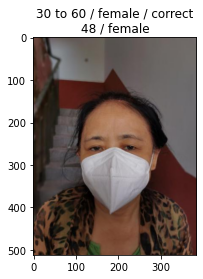

In [99]:
random_idx = np.random.randint(smaller_train_size)
random_sample = smaller_train_images[random_idx]

label = int(random_sample.split('/')[-1][:2])

if label // 6 == 0:
    mask = 'correct'
elif label // 6 == 1:
    mask = 'incorrect'
elif label // 6 == 2:
    mask = 'not wear'
else:
    raise "?"

if (label // 3) % 2 == 0:
    gender = 'male'
else:
    gender = 'female'

if label % 3 == 0:
    age = 'under 30'
elif label % 3 == 1:
    age = '30 to 60'
else:
    age = '60 or more'
    
folder_in_origin = '_'.join(random_sample.split('/')[-1].split('_')[1:5]).split('.')[0]
_, gender_info, _, age_info, _ = train_info_origin.loc[train_info_origin.path == folder_in_origin].iloc[0]

random_image = cv2.imread(random_sample)
random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)
plt.imshow(random_image)

title = f"{age} / {gender} / {mask}\n{age_info} / {gender_info}"
plt.title(title)
plt.show()

In [127]:
random_image.shape

(512, 384, 3)

In [159]:
from scipy.stats import norm

def age_norm(x, mu, sigma=15):
    z = (x - mu) / sigma
    return norm.pdf(z) / norm.pdf(0)


image_folder = np.random.choice(glob(os.path.join('/opt/ml/input/data/train/images', '*')))
assert os.path.isdir(image_folder), image_folder
image_folder = image_folder.split('/')[-1]

hard_label = train_info_origin.loc[train_info_origin.path == image_folder].age.iloc[0]

soft_label = torch.zeros(3).to(torch.float)
soft_label[0] = age_norm(hard_label, mu=15, sigma=15) if hard_label >= 15 else 1
soft_label[1] = age_norm(hard_label, mu=45, sigma=15)
soft_label[2] = age_norm(hard_label, mu=60, sigma=5) if hard_label < 60 else 1

soft_label, hard_label

(tensor([9.2312e-01, 2.7804e-01, 6.1484e-14]), 21)

In [162]:
import torch.nn.functional as F
F.softmax(soft_label, dim=0)

tensor([0.5203, 0.2730, 0.2067])

In [71]:
trains[3][5:10]

['001482_female_Asian_60',
 '001323_male_Asian_24',
 '003071_female_Asian_20',
 '003771_male_Asian_55',
 '000511_female_Asian_55']

In [16]:
# for i in range(4):
#     os.mkdir(f'/opt/ml/input/data/train/_{i}')

In [93]:
num_copied_files = 0
for fold_idx, folders in enumerate(trains):
    print(f"[TRAIN FOLD {fold_idx}]", end="")
    train_base = os.path.join(train_path, f"train_{fold_idx}")
    if not os.path.exists(train_base):
        os.mkdir(train_base)

    for folder_idx, folder in enumerate(folders):
        train_images_in_folder = glob(os.path.join(train_origin_path, folder, '*'))
        train_folder_class = train_info.loc[folder].class_num
        print(f"\r[TRAIN FOLD {fold_idx}] {folder_idx} / {len(folders)}", end="")
        for image_idx, origin in enumerate(train_images_in_folder):
            origin_name, _ = origin.split('/')[-1].split('.')
            dest_name = f'{6 * mask_dict(origin_name) + train_folder_class:02d}_{folder}_{image_idx}.jpg'
            dest = os.path.join(train_base, dest_name)
            if os.path.exists(dest):
                continue
            shutil.copy(origin, dest)
            num_copied_files += len(glob(os.path.join(train_base, '*.jpg')))


print()

for fold_idx, folders in enumerate(valids):
    print(f"[VALID FOLD {fold_idx}]", end="")
    valid_base = os.path.join(train_path, f"valid_{fold_idx}")
    if not os.path.exists(valid_base):
        os.mkdir(valid_base)
    
    for folder_idx, folder in enumerate(folders):
        valid_images_in_folder = glob(os.path.join(train_origin_path, folder, '*'))
        valid_folder_class = train_info.loc[folder].class_num
        print(f"\r[VALID FOLD {fold_idx}] {folder_idx + 1} / {len(folders)}", end="")
        for image_idx, origin in enumerate(valid_images_in_folder):
            origin_name, _ = origin.split('/')[-1].split('.')
            dest_name = f'{6 * mask_dict(origin_name) + valid_folder_class:02d}_{folder}_{image_idx}.jpg'
            dest = os.path.join(valid_base, dest_name)
            if os.path.exists(dest):
                continue
            shutil.copy(origin, dest)
            num_copied_files += len(glob(os.path.join(valid_base, '*.jpg')))

        

print()

print(f'\nDone: Copied {num_copied_files} images.')

[TRAIN FOLD 3] 1727 / 1728[TRAIN FOLD 1][TRAIN FOLD 2][TRAIN FOLD 3]
[VALID FOLD 3] 586 / 586[VALID FOLD 3]

Done: Copied 328005076 images.


In [34]:
smaller_train_images = glob(os.path.join(dest_base, '*.jpg'))
smaller_train_size = len(smaller_train_images)
smaller_train_size

16198

In [39]:
def age_from_label(label: int):
    '''
    0 <- under 30
    1 <- between 30 and 60
    2 <- over 60
    '''
    return label % 3


def gender_from_label(label: int):
    '''
    0 <- male
    1 <- female
    '''
    return (label // 3) % 2


def mask_from_label(label: int):
    '''
    0 <- wear
    1 <- incorrect
    2 <- not wear
    '''
    return label // 6


def decode_label(label: int):
    return label % 3, (label // 3) % 2, label // 6

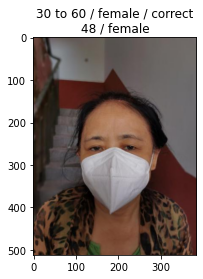

In [99]:
random_idx = np.random.randint(smaller_train_size)
random_sample = smaller_train_images[random_idx]

label = int(random_sample.split('/')[-1][:2])

if label // 6 == 0:
    mask = 'correct'
elif label // 6 == 1:
    mask = 'incorrect'
elif label // 6 == 2:
    mask = 'not wear'
else:
    raise "?"

if (label // 3) % 2 == 0:
    gender = 'male'
else:
    gender = 'female'

if label % 3 == 0:
    age = 'under 30'
elif label % 3 == 1:
    age = '30 to 60'
else:
    age = '60 or more'
    
folder_in_origin = '_'.join(random_sample.split('/')[-1].split('_')[1:5]).split('.')[0]
_, gender_info, _, age_info, _ = train_info_origin.loc[train_info_origin.path == folder_in_origin].iloc[0]

random_image = cv2.imread(random_sample)
random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)
plt.imshow(random_image)

title = f"{age} / {gender} / {mask}\n{age_info} / {gender_info}"
plt.title(title)
plt.show()

In [127]:
random_image.shape

(512, 384, 3)

In [159]:
from scipy.stats import norm

def age_norm(x, mu, sigma=15):
    z = (x - mu) / sigma
    return norm.pdf(z) / norm.pdf(0)


image_folder = np.random.choice(glob(os.path.join('/opt/ml/input/data/train/images', '*')))
assert os.path.isdir(image_folder), image_folder
image_folder = image_folder.split('/')[-1]

hard_label = train_info_origin.loc[train_info_origin.path == image_folder].age.iloc[0]

soft_label = torch.zeros(3).to(torch.float)
soft_label[0] = age_norm(hard_label, mu=15, sigma=15) if hard_label >= 15 else 1
soft_label[1] = age_norm(hard_label, mu=45, sigma=15)
soft_label[2] = age_norm(hard_label, mu=60, sigma=5) if hard_label < 60 else 1

soft_label, hard_label

(tensor([9.2312e-01, 2.7804e-01, 6.1484e-14]), 21)

In [162]:
import torch.nn.functional as F
F.softmax(soft_label, dim=0)

tensor([0.5203, 0.2730, 0.2067])

In [102]:
all_images = glob('/opt/ml/input/data/train/smaller_/*.jpg')
random.shuffle(all_images)
len(all_images)

16198

In [103]:
all_labels = list(map(lambda x: int(x.split('/')[-1][:2]), all_images))
from collections import Counter
counter = Counter(all_labels)

In [107]:
counter

Counter({3: 3610,
         0: 2715,
         4: 2960,
         15: 722,
         16: 592,
         2: 415,
         12: 543,
         7: 265,
         5: 545,
         1: 1325,
         6: 543,
         13: 265,
         17: 109,
         10: 592,
         9: 722,
         8: 83,
         11: 109,
         14: 83})

In [ ]:
ordered_counter = [counter[i] for i in range(18)]


In [ ]:
train_base = '/opt/ml/input/data/train/train'
valid_base = '/opt/ml/input/data/train/valid'